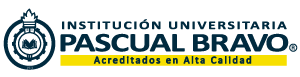

# **MODELOS DE REGRESIÓN**

Ingry Natalia Gómez Miranda

#**1. Presentación de los datos**

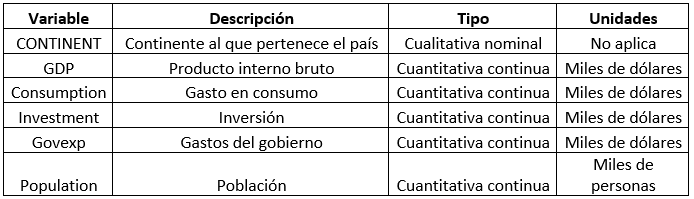

# **2. Cargar el conjunto de datos**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Cargando archivo desde el directorio de trabajo
from google.colab import files
import pandas as pd

# Cargar un archivo desde tu dispositivo local
Archivo = files.upload()

# Obtener la ruta del archivo cargado
Ruta = list(Archivo.keys())[0]

# Leer el archivo con pandas
datos = pd.read_csv(Ruta,sep=';')

# Mostrar los 10 primeros registros del DataFrame
print()
datos.head(10)

Saving econom_countries.csv to econom_countries.csv



,NUM,COUNTRY,CONTINENT,GDP,Consumption,Investment,Govexp,Population
0,1,ALGERIA,AFRICA,69433331,3.457780e+07,1.249800e+07,1.555307e+07,25003
1,2,BENIN,AFRICA,4360800,3.279322e+06,3.139776e+05,8.241912e+05,4740
2,3,BURKINA FASO,AFRICA,4607176,3.469204e+06,4.468961e+05,1.045829e+06,9016
3,4,BURUNDI,AFRICA,3020600,2.422521e+06,2.054008e+05,5.316256e+05,5492
4,5,CAMEROON,AFRICA,14128424,7.869532e+06,1.003118e+06,3.433207e+06,11524
5,6,CAPE VERDE IS.,AFRICA,392518,3.085191e+05,7.575597e+04,5.377497e+04,371
6,7,CENTRAL AFR.R.,AFRICA,1741632,1.536119e+06,7.663181e+04,2.455701e+05,3008
7,8,CHAD,AFRICA,2266320,1.586424e+06,3.626112e+04,7.660162e+05,5680
8,9,COMOROS,AFRICA,267900,1.886016e+05,3.027270e+04,8.063790e+04,475
9,10,CONGO,AFRICA,5032236,2.299732e+06,1.962572e+05,1.811605e+06,2276


In [3]:
# Cargar las librerías
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
# StandardScaler(): Normaliza los datos restando el promedio y dividiendo sobre la desviación estándar en cada variable (Z-Score).
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NUM          116 non-null    int64  
 1   COUNTRY      116 non-null    object 
 2   CONTINENT    116 non-null    object 
 3   GDP          116 non-null    int64  
 4   Consumption  116 non-null    float64
 5   Investment   116 non-null    float64
 6   Govexp       116 non-null    float64
 7   Population   116 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 7.4+ KB


In [5]:
#El resumen estadístico de nuestro dataset total.
datos.describe()

,NUM,GDP,Consumption,Investment,Govexp,Population
count,116.000000,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02
mean,58.500000,1.655568e+08,1.045242e+08,3.747349e+07,2.413470e+07,3.897512e+04
std,33.630343,4.936769e+08,3.217497e+08,1.156573e+08,6.905220e+07,1.335379e+05
min,1.000000,2.014800e+05,1.164554e+05,3.027270e+04,3.303355e+04,4.000000e+01
25%,29.750000,4.963363e+06,3.213227e+06,3.964568e+05,1.014843e+06,3.232000e+03
50%,58.500000,2.078589e+07,1.562357e+07,2.553911e+06,3.767007e+06,8.483500e+03
75%,87.250000,1.089873e+08,7.400426e+07,1.805847e+07,1.667743e+07,2.437075e+04
max,116.000000,4.520216e+09,3.060186e+09,9.176039e+08,5.921483e+08,1.133683e+06


# **3. Pertinencia de la regresión simple: explorar los datos**

In [6]:
#Elegir las columnas para la regresión simple
simple=datos[["GDP","Investment"]]

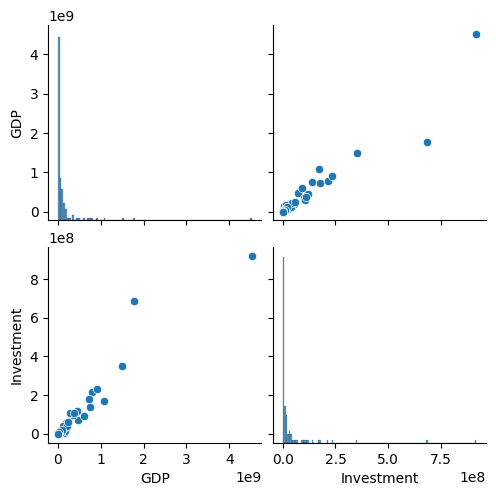

In [7]:
#Gráfico exploratorio para la regresión
sns.pairplot(simple)

In [8]:
#La correlación
#La matriz de correlaciones
correlation_matrix=simple.corr()
simple.corr()

,GDP,Investment
GDP,1.000000,0.963414
Investment,0.963414,1.000000


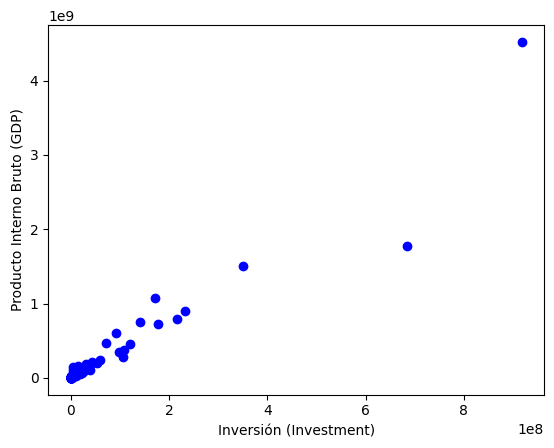

In [9]:
# Grafiquemos los datos del dataset
plt.ylabel("Producto Interno Bruto (GDP)")
plt.xlabel("Inversión (Investment)")
plt.scatter(datos["Investment"], datos["GDP"], color="blue")
plt.show()

El gráfico y la correlación muestran una relación lineal, de intensidad considerable (**r = 0.96**). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el Producto interno bruto en función de la Inversión.

# **4. Desarrollo del modelo de regresión simple**

**4.1 Vefificar la existencia del modelo: ANOVA**

In [10]:
#Verificar la existencia del modelo
formula = 'GDP ~ Investment'

model = sm.formula.ols(formula, data= datos).fit()
aov_table =  sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Investment,2.601413e+19,1.0,1473.006953,5.000532e-67
Residual,2.013304e+18,114.0,NaN,NaN


**4.2 las pruebas invividuales y el ajuste del modelo**

In [11]:
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1473.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           5.00e-67
Time:                        19:19:19   Log-Likelihood:                -2333.4
No. Observations:                 116   AIC:                             4671.
Df Residuals:                     114   BIC:                             4676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.146e+07    1.3e+07      0.883      0.3

# **6. Pertinencia de la regresión múltiple: explorar los datos**

In [12]:
#Separar las variables explicatorias
multiple=datos[["GDP","Consumption","Investment","Govexp","Population"]]

x=datos[["Consumption","Investment","Govexp","Population"]]
y=datos[["GDP"]]

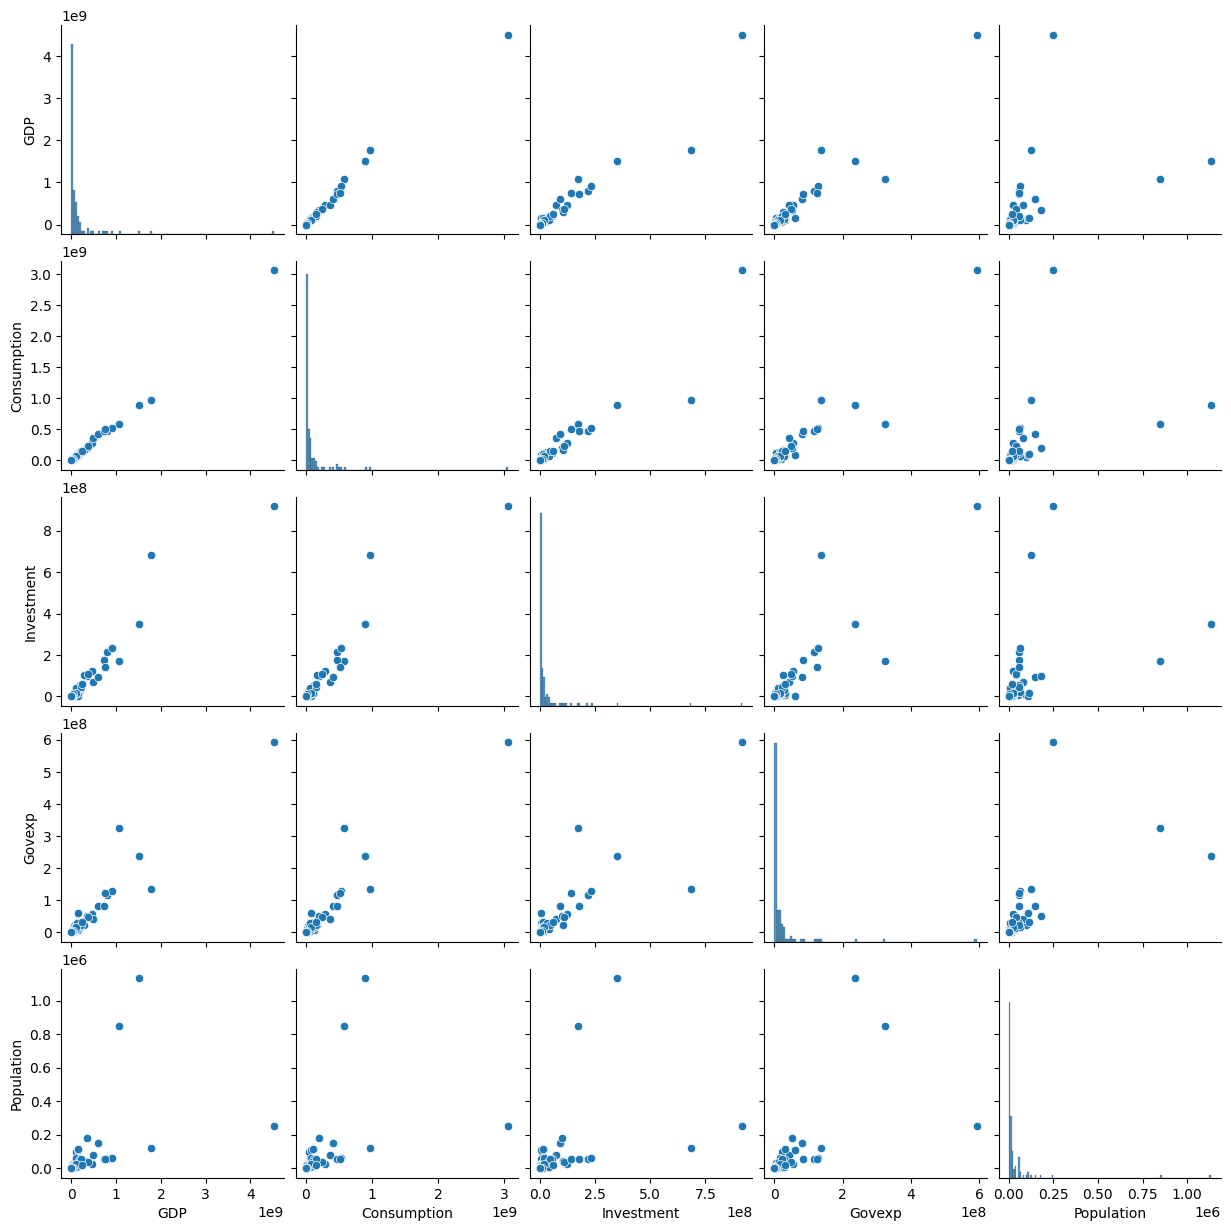

In [ ]:
#Gráfico exploratorio por pares de variables
sns.pairplot(multiple)

                  GDP  Consumption  Investment    Govexp  Population
GDP          1.000000     0.996594    0.963414  0.954783    0.498000
Consumption  0.996594     1.000000    0.944338  0.948156    0.462373
Investment   0.963414     0.944338    1.000000  0.874278    0.453116
Govexp       0.954783     0.948156    0.874278  1.000000    0.644067
Population   0.498000     0.462373    0.453116  0.644067    1.000000
Axes(0.125,0.11;0.62x0.77)


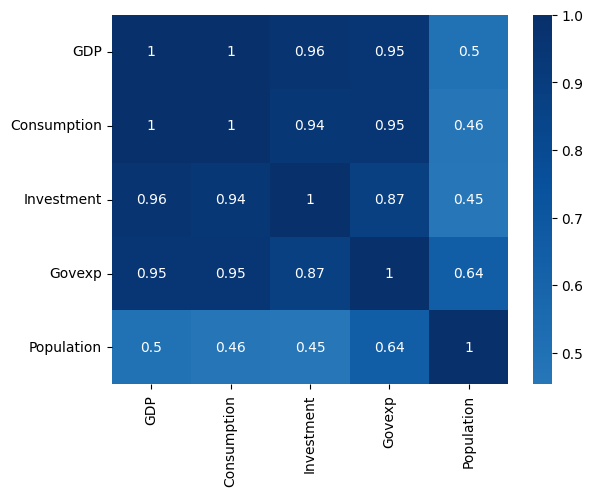

In [13]:
correlation_matrix=multiple.corr()
print(multiple.corr())
print(sns.heatmap(correlation_matrix, annot=True, cmap="Blues", center=0))

# **7. Desarrollo del modelo de regresión múltiple**

**7.1 La existencia del modelo**

In [14]:
#Verificar la existencia del modelo
formula_m = 'GDP ~ Consumption+Investment+Govexp+Population'

model_m = sm.formula.ols(formula_m, data= datos).fit()
aov_table_m =  sm.stats.anova_lm(model_m,typ=2)
aov_table_m

,sum_sq,df,F,PR(>F)
Consumption,3.355413e+17,1.0,13749.854872,3.358109e-118
Investment,1.385576e+17,1.0,5677.832444,3.750209e-97
Govexp,1.833187e+16,1.0,751.205637,3.138218e-51
Population,8.542454e+14,1.0,35.005381,3.714726e-08
Residual,2.708762e+15,111.0,NaN,NaN


**7.2 las pruebas invividuales y el ajuste del modelo**

In [15]:
summary_m = model_m.summary()
print(summary_m)

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.871e+05
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          8.51e-222
Time:                        19:19:38   Log-Likelihood:                -1949.9
No. Observations:                 116   AIC:                             3910.
Df Residuals:                     111   BIC:                             3924.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.29e+05   4.89e+05      1.082      

# **8. Modelo Lineal General**

**8.1 La existencia del modelo**

In [16]:
#Verificar la existencia del modelo
formula_glm = 'GDP ~ Consumption+Investment+Govexp+Population+CONTINENT'

model_glm = sm.formula.ols(formula_glm, data= datos).fit()
aov_table_glm =  sm.stats.anova_lm(model_glm,typ=2)
aov_table_glm

,sum_sq,df,F,PR(>F)
CONTINENT,3.326067e+13,4.0,0.332544,8.555362e-01
Consumption,3.081867e+17,1.0,12325.158401,2.522716e-112
Investment,1.276243e+17,1.0,5104.014480,4.048977e-92
Govexp,1.791764e+16,1.0,716.571505,3.146830e-49
Population,7.878955e+14,1.0,31.509918,1.577357e-07
Residual,2.675501e+15,107.0,NaN,NaN


**8.2 las pruebas invividuales y el ajuste del modelo**

In [17]:
summary_glm = model_glm.summary()
print(summary_glm)

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.401e+05
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.37e-211
Time:                        19:19:45   Log-Likelihood:                -1949.2
No. Observations:                 116   AIC:                             3916.
Df Residuals:                     107   BIC:                             3941.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.903e+05 